In [1]:
% matplotlib inline
import matplotlib
## matplotlib 한글사용
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

## 지도 학습
### 지도 학습 알고리즘

X.shape: (26, 2)


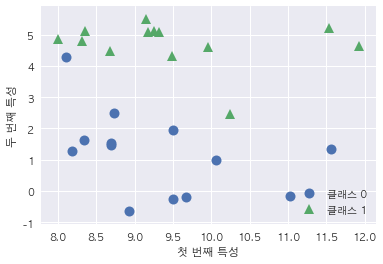

In [2]:
import mglearn
X, y = mglearn.datasets.make_forge()

# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'타깃')

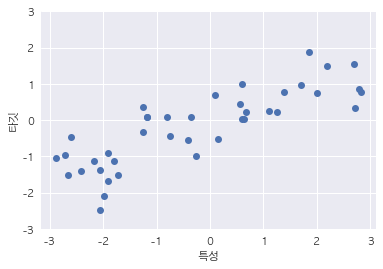

In [3]:
# wave 데이터셋 사용
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [4]:
#  load_breast_cancer 함수 사용

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


In [6]:
print("클래스별 샘플 갯수:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})) # bincount 0, 1 카운트

클래스별 샘플 갯수:
{'malignant': 212, 'benign': 357}


In [7]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### k-최근접 이웃
#### k-최근접 이웃 분류

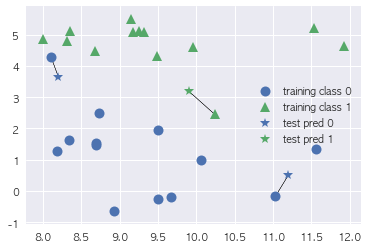

In [8]:

import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)

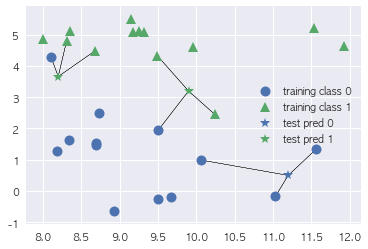

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
# 훈련 세트와 테스트 세트를 나눈다.
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge() # make_forge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
# KNeighborsClassifier를 사용, 객체만들기
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
# 훈련세트를 사용하여 분류 모델을 학습시키기
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
# predict 메서드 호출해서 예측
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [14]:
# score 메서드 호출하여 평가
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


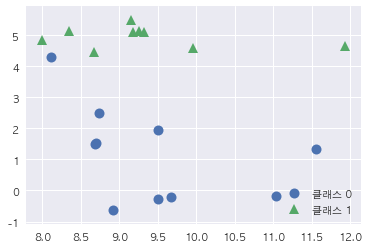

In [15]:
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.legend(["클래스 0", "클래스 1"], loc=4)

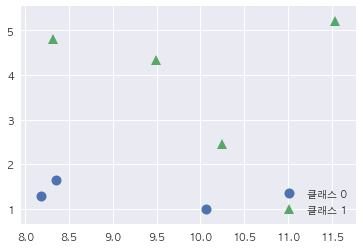

In [16]:
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)
plt.legend(["클래스 0", "클래스 1"], loc=4)

### KNeighborsClassifier 분석

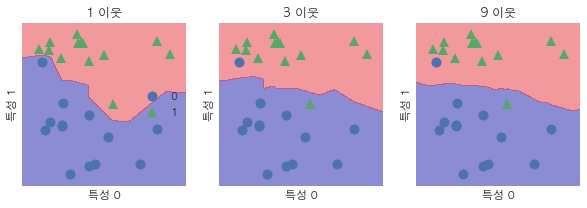

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, eps=0.5, ax=ax, alpha=.4,fill=True)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y,ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

부드러운 경계는 단순한 모델을 의미한다.

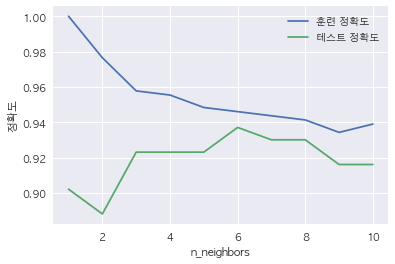

In [18]:
# 유방암 데이터 셋
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# 훈련셋과 테스트셋을 나눈다.
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

```
과대적합과 과소적합의 특징을 볼 수 있다. 
최근접 이웃 수가 하나일때는 훈련 데이터에 대한 예측이 완벽하다.
하지만 이웃 수가 늘어나면 모델은 단순하지도 훈련 데이터의 정확도는 줄어든다.
이웃을 하나 사용한 테스트 셋은 이웃을 많이 사용했을 때보다 정확도가 낮다. 모델이 너무 복잡하다는 것을 설명한다.
이웃을 10개로 사용했을때는 모델이 너무 단순해서 정확도는 더 나빠진다.
```

### k-Neighbors Regression (k-최근법 이웃회귀)

wave 데이터 셋을 사용

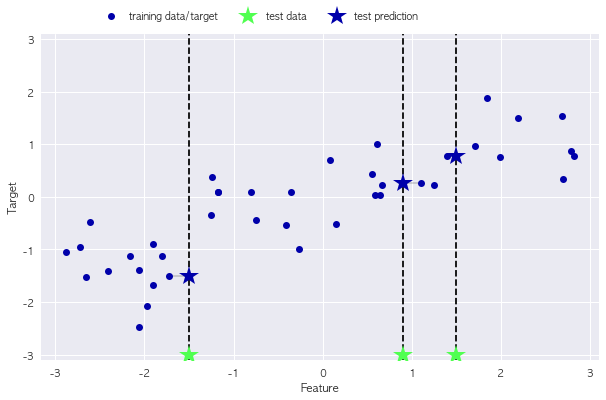

In [19]:
import mglearn
mglearn.plots.plot_knn_regression(n_neighbors=1)

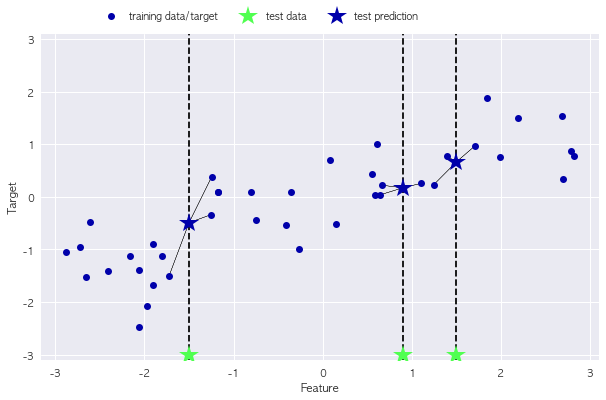

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

#### scikit-learn에서 회귀를 위한 KNeighborsRegressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


#### KNeighborsRegressor 분석

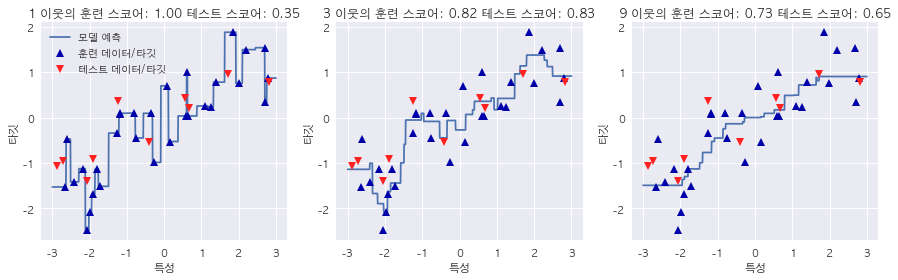

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

이웃을 많이 사용하면 훈련 데이터에는 잘 안맞을 수 있지만 더 안정된 예측을 얻게 됩니다.

### 선형 모델
#### 선형 회귀 모델
\begin{align*}
\end{align*}

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


w[0]: 0.393906  b: -0.031804


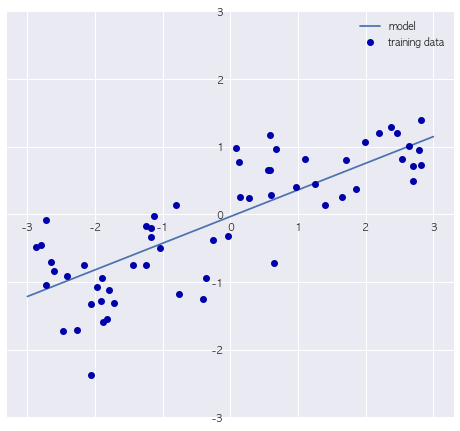

In [27]:
mglearn.plots.plot_linear_regression_wave()

#### 선형회귀(최소제곱법)

평균제곱오차를 최소화하는 파라미터 w,b를 찾습니다.

In [28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [29]:
print("lr.coef_: {}".format(lr.coef_)) #가중치(w)
print("lr.intercept_: {}".format(lr.intercept_)) #절편(b)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
훈련 세트 점수: 0.67
테스트 세트 점수: 0.66
